In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_data=pd.read_csv('/home/maithreyan/ML/Titanic/titanic/train.csv')
test_data=pd.read_csv('/home/maithreyan/ML/Titanic/titanic/test.csv')
train=train_data.copy()
test=test_data.copy()

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train.drop(['PassengerId'],axis=1,inplace=True)
test.drop(['PassengerId'],axis=1,inplace=True)
pred=train_data['Survived']

In [5]:
print(pred)

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64


In [6]:
train.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [7]:
test.isnull().sum()

Pclass        0
Name          0
Sex           0
Age          86
SibSp         0
Parch         0
Ticket        0
Fare          1
Cabin       327
Embarked      0
dtype: int64

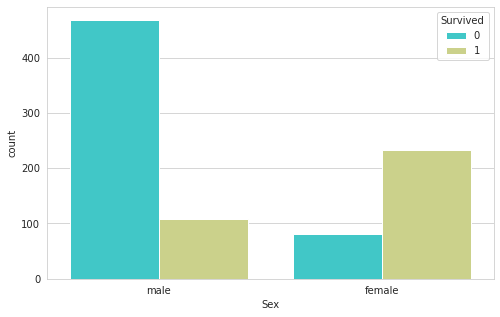

In [8]:
plt.figure(figsize=(8,5))
sns.set_style('whitegrid')
sns.countplot(x='Sex',hue='Survived',data=train_data,palette='rainbow')

In [9]:
sex1=pd.get_dummies(train['Sex'])
sex2=pd.get_dummies(test['Sex'])

train.drop(['Sex'],axis=1,inplace=True)
test.drop(['Sex'],axis=1,inplace=True)

train=pd.concat([train,sex1],axis=1)
test=pd.concat([test,sex2],axis=1)

In [10]:
train.head()


,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,female,male
0,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,S,0,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C,1,0
2,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,S,1,0
4,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,S,0,1


In [11]:
sex1.head()


,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


In [12]:
train.drop(['female'],axis=1,inplace=True)
test.drop(['female'],axis=1,inplace=True)

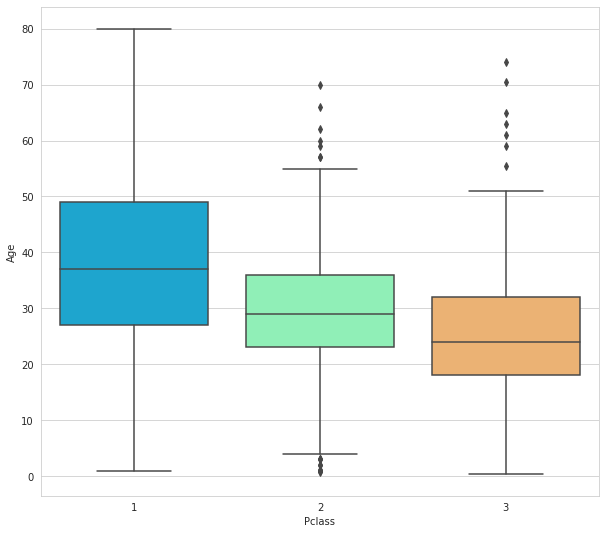

In [13]:
plt.figure(figsize=(10,9))
sns.boxplot(x='Pclass',y='Age',data=train_data,palette='rainbow')

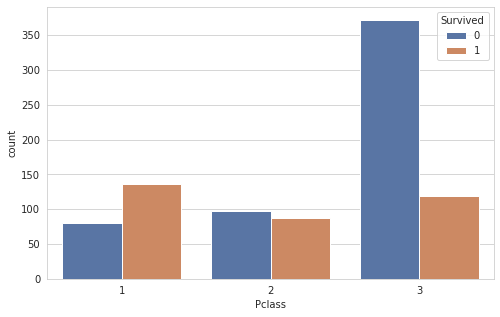

In [14]:
plt.figure(figsize=(8,5))
sns.set_style('whitegrid')
sns.countplot(x='Pclass',hue='Survived',data=train_data,palette='deep')

Text(0, 0.5, 'Density')

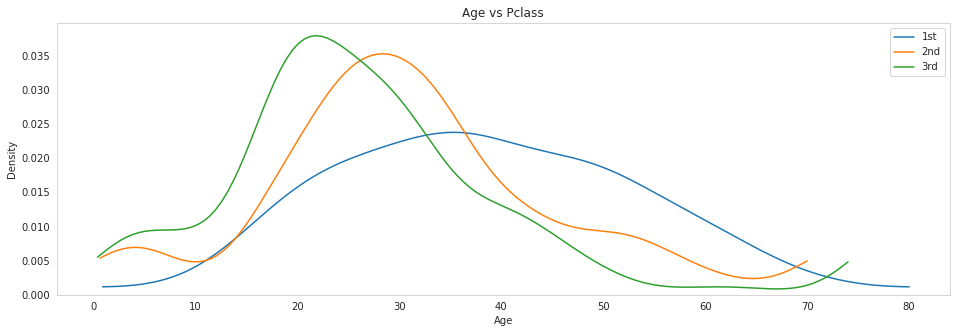

In [15]:
plt.figure(figsize=(16,5))
for x in [1,2,3]:
    sns.kdeplot(data=train_data.Age[train_data.Pclass==x],cut=0,clip=(0,200)).grid(False)
plt.title("Age vs Pclass")
plt.legend(("1st","2nd","3rd"))
plt.xlabel("Age")
plt.ylabel("Density")

In [16]:
train['Age'].describe()


count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [17]:
train["Age"].fillna(train['Age'].describe().loc[['50%']][0],inplace=True)
test["Age"].fillna(test['Age'].describe().loc[['50%']][0],inplace=True)

Text(0.5, 1.0, 'Fare distribution for all the people')

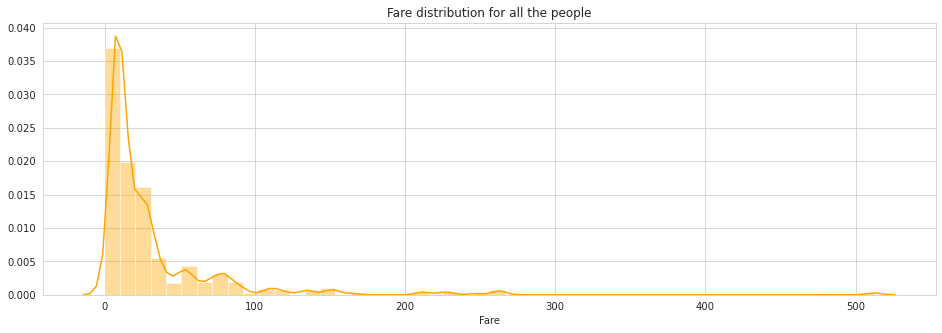

In [18]:
f, axes = plt.subplots(1,1,figsize=(16,5))
g1=sns.distplot(train["Fare"],color="orange",ax=axes)
plt.title("Fare distribution for all the people")

In [19]:
Fare_0=[]
Fare_1=[]
for i in range(0,891):
    if train_data["Survived"][i]==0:
        Fare_0.append(train["Fare"][i])
    else:
        Fare_1.append(train["Fare"][i])


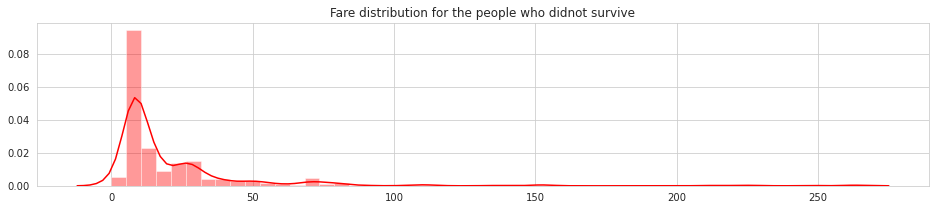

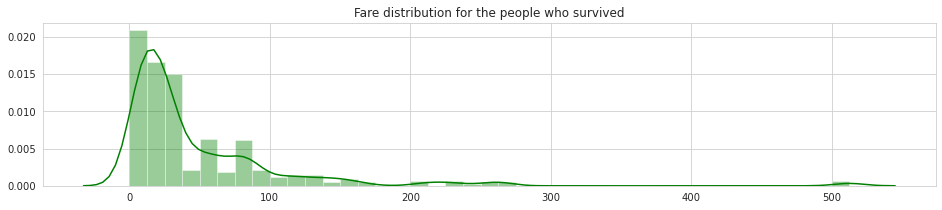

In [20]:
f,axes=plt.subplots(1,1,figsize=(16,3))
g1=sns.distplot(Fare_0,color="red",ax=axes)
plt.title("Fare distribution for the people who didnot survive")

f,axes=plt.subplots(1,1,figsize=(16,3))
g1=sns.distplot(Fare_1,color="green",ax=axes)
plt.title("Fare distribution for the people who survived")

plt.show()

In [21]:
test["Fare"].describe()

count    417.000000
mean      35.627188
std       55.907576
min        0.000000
25%        7.895800
50%       14.454200
75%       31.500000
max      512.329200
Name: Fare, dtype: float64

In [22]:
test["Fare"].fillna(test['Fare'].describe().loc[['50%']][0],inplace=True)

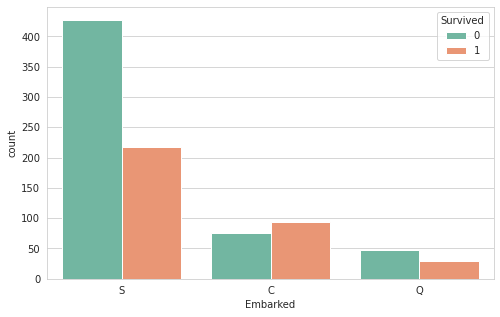

In [23]:
plt.figure(figsize=(8,5))
sns.set_style('whitegrid')
sns.countplot(x='Embarked',hue='Survived',data=train_data,palette="Set2")

In [24]:
train["Embarked"].fillna("S",inplace=True)
test["Embarked"].fillna("S",inplace=True)

In [25]:
embark1 = pd.get_dummies(train['Embarked'])
embark2 = pd.get_dummies(test['Embarked'])

train.drop(['Embarked'],axis=1,inplace=True)
test.drop(['Embarked'],axis=1,inplace=True)

train = pd.concat([train,embark1],axis=1)
test = pd.concat([test,embark2],axis=1)

In [26]:
train.head()

,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,male,C,Q,S
0,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,1,0,0,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,0,1,0,0
2,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,0,0,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,0,0,0,1
4,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,1,0,0,1


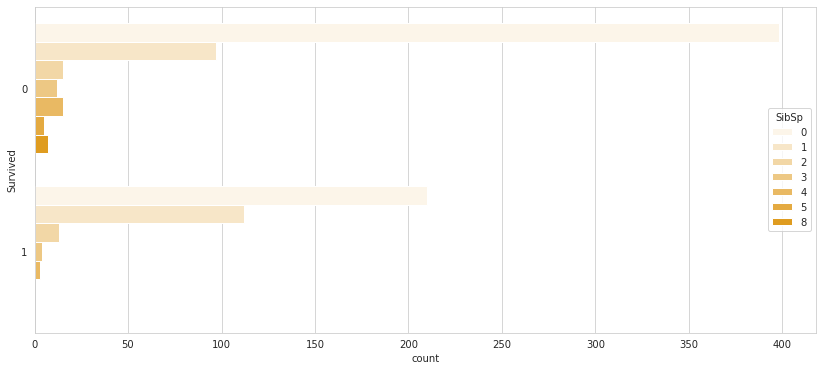

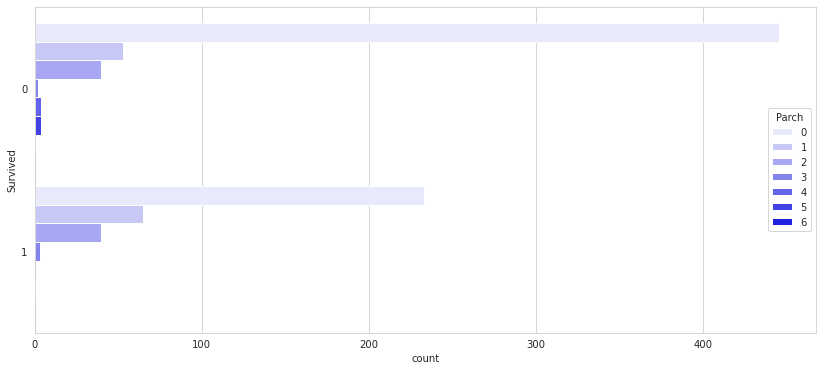

In [28]:
plt.figure(figsize=(14,6))
ax=sns.countplot(y="Survived",hue="SibSp",data=train,color="Orange")

plt.figure(figsize=(14,6))
ax=sns.countplot(y="Survived",hue="Parch",data=train,color="blue")

In [29]:
def fam(x):
    if(x['SibSp']+x["Parch"])>0:
        return 1
    else:
        return 0
train['Family']=train.apply(fam,axis=1)
test['Family']=test.apply(fam,axis=1)

In [30]:
train=train.drop(['SibSp','Parch'],axis=1)
test=test.drop(['SibSp','Parch'],axis=1)

In [31]:
train.head()

,Survived,Pclass,Name,Age,Ticket,Fare,Cabin,male,C,Q,S,Family
0,0,3,"Braund, Mr. Owen Harris",22.0,A/5 21171,7.2500,NaN,1,0,0,1,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,PC 17599,71.2833,C85,0,1,0,0,1
2,1,3,"Heikkinen, Miss. Laina",26.0,STON/O2. 3101282,7.9250,NaN,0,0,0,1,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,113803,53.1000,C123,0,0,0,1,1
4,0,3,"Allen, Mr. William Henry",35.0,373450,8.0500,NaN,1,0,0,1,0


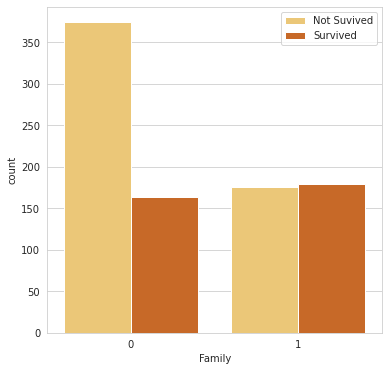

In [33]:
plt.figure(figsize=(6,6))
sns.set_style('whitegrid')
sns.countplot(x = 'Family',hue='Survived',data=train, palette="YlOrBr" )
plt.legend(("Not Suvived","Survived"))

In [34]:
train["Cabin"]=pd.Series([i[0] if not pd.isnull(i) else 'X' for i in train['Cabin']])
test["Cabin"]=pd.Series([i[0] if not pd.isnull(i) else 'X' for i in test['Cabin']])

<Figure size 576x360 with 0 Axes>

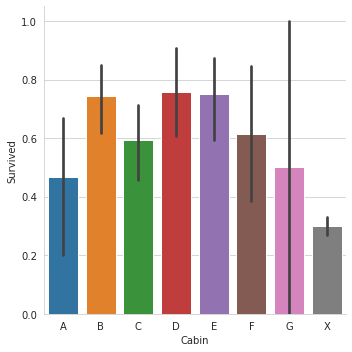

In [35]:
plt.figure(figsize=(8,5))
g=sns.catplot(y="Survived",x="Cabin",data=train,kind="bar",order=['A','B','C','D','E','F','G','X'])

In [36]:
train["Cabin"]=train["Cabin"].map({"X":0,"A":1,"B":2,"C":3,"D":4,"E":5,"F":6,"G":7,"T":0})
train["Cabin"]=train["Cabin"].astype(int)

test["Cabin"]=test["Cabin"].map({"X":0,"A":1,"B":2,"C":3,"D":4,"E":5,"F":6,"G":7,"T":0})
test["Cabin"]=test["Cabin"].astype(int)

In [37]:
train_title=[i.split(",")[1].split(".")[0].strip() for i in train["Name"]]
train["Title"]=pd.Series(train_title)
test_title=[i.split(",")[1].split(".")[0].strip() for i in test["Name"]]
test["Title"]=pd.Series(test_title)

In [38]:
train.head()

,Survived,Pclass,Name,Age,Ticket,Fare,Cabin,male,C,Q,S,Family,Title
0,0,3,"Braund, Mr. Owen Harris",22.0,A/5 21171,7.2500,0,1,0,0,1,1,Mr
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,PC 17599,71.2833,3,0,1,0,0,1,Mrs
2,1,3,"Heikkinen, Miss. Laina",26.0,STON/O2. 3101282,7.9250,0,0,0,0,1,0,Miss
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,113803,53.1000,3,0,0,0,1,1,Mrs
4,0,3,"Allen, Mr. William Henry",35.0,373450,8.0500,0,1,0,0,1,0,Mr


In [39]:
train=train.drop(['Name'],axis=1)
test=test.drop(['Name'],axis=1)

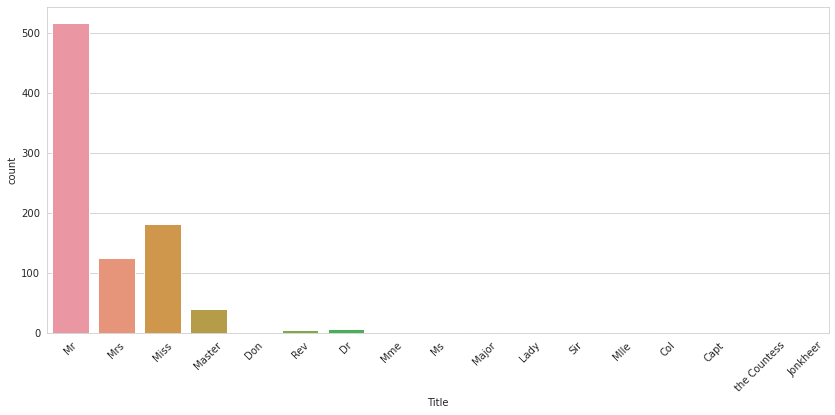

In [40]:
plt.figure(figsize=(14,6))
g=sns.countplot(x="Title",data=train)
g=plt.setp(g.get_xticklabels(),rotation=45)

In [41]:
train["Title"] = train["Title"].replace(['Lady', 'the Countess','Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
train["Title"] = train["Title"].map({"Master":0, "Miss":1, "Ms" : 1 , "Mme":1, "Mlle":1, "Mrs":1, "Mr":2, "Rare":3})
train["Title"] = train["Title"].astype(int)
test["Title"] = test["Title"].replace(['Lady', 'the Countess','Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
test["Title"] = test["Title"].map({"Master":0, "Miss":1, "Ms" : 1 , "Mme":1, "Mlle":1, "Mrs":1, "Mr":2, "Rare":3})
test["Title"] = test["Title"].astype(int)

In [42]:
train.head()

,Survived,Pclass,Age,Ticket,Fare,Cabin,male,C,Q,S,Family,Title
0,0,3,22.0,A/5 21171,7.2500,0,1,0,0,1,1,2
1,1,1,38.0,PC 17599,71.2833,3,0,1,0,0,1,1
2,1,3,26.0,STON/O2. 3101282,7.9250,0,0,0,0,1,0,1
3,1,1,35.0,113803,53.1000,3,0,0,0,1,1,1
4,0,3,35.0,373450,8.0500,0,1,0,0,1,0,2


In [47]:
train['Title'].value_counts()

2    517
1    311
0     40
3     23
Name: Title, dtype: int64

In [48]:
Ticket1=[]
for i in list(train.Ticket):
    if not i.isdigit():
        Ticket1.append(i.replace(".","").replace("/","").strip().split(' ')[0])
    else:
        Ticket1.append("X")
train["Ticket"]=Ticket1
Ticket2=[]
for i in list(test.Ticket):
    if not i.isdigit():
        Ticket2.append(i.replace(".","").replace("/","").strip().split(' ')[0])
    else:
        Ticket2.append("X")
test["Ticket"]=Ticket2

In [49]:
train["Ticket"].unique()

array(['A5', 'PC', 'STONO2', 'X', 'PP', 'CA', 'SCParis', 'SCA4', 'A4',
       'SP', 'SOC', 'WC', 'SOTONOQ', 'WEP', 'STONO', 'C', 'SCPARIS',
       'SOP', 'Fa', 'LINE', 'FCC', 'SWPP', 'SCOW', 'PPP', 'SC', 'SCAH',
       'AS', 'SOPP', 'FC', 'SOTONO2', 'CASOTON'], dtype=object)

In [50]:
test["Ticket"].unique()

array(['X', 'A4', 'WEP', 'SCPARIS', 'STONO2', 'PC', 'C', 'A5', 'SCAH',
       'CA', 'WC', 'SOTONOQ', 'STONO', 'SCA3', 'FCC', 'FC', 'PP',
       'STONOQ', 'SCA4', 'SOPP', 'SOC', 'SOTONO2', 'AQ4', 'A', 'SC',
       'SCParis', 'LP', 'AQ3'], dtype=object)

In [51]:
np.union1d(train["Ticket"],test["Ticket"])

array(['A', 'A4', 'A5', 'AQ3', 'AQ4', 'AS', 'C', 'CA', 'CASOTON', 'FC',
       'FCC', 'Fa', 'LINE', 'LP', 'PC', 'PP', 'PPP', 'SC', 'SCA3', 'SCA4',
       'SCAH', 'SCOW', 'SCPARIS', 'SCParis', 'SOC', 'SOP', 'SOPP',
       'SOTONO2', 'SOTONOQ', 'SP', 'STONO', 'STONO2', 'STONOQ', 'SWPP',
       'WC', 'WEP', 'X'], dtype=object)

In [53]:
train=pd.get_dummies(train,columns=['Ticket'],prefix="T")
test=pd.get_dummies(test,columns=['Ticket'],prefix="T")

In [54]:
train.head()

,Survived,Pclass,Age,Fare,Cabin,male,C,Q,S,Family,...,T_SOPP,T_SOTONO2,T_SOTONOQ,T_SP,T_STONO,T_STONO2,T_SWPP,T_WC,T_WEP,T_X
0,0,3,22.0,7.2500,0,1,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,38.0,71.2833,3,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,3,26.0,7.9250,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
3,1,1,35.0,53.1000,3,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,1
4,0,3,35.0,8.0500,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1


In [55]:
train = train.drop(['T_SP','T_SOP','T_Fa','T_LINE','T_SWPP','T_SCOW','T_PPP','T_AS','T_CASOTON'],axis = 1)
test = test.drop(['T_SCA3','T_STONOQ','T_AQ4','T_A','T_LP','T_AQ3'],axis = 1)

In [56]:
train.drop(['Survived'],axis=1,inplace=True)

In [57]:
train.head()

,Pclass,Age,Fare,Cabin,male,C,Q,S,Family,Title,...,T_SCParis,T_SOC,T_SOPP,T_SOTONO2,T_SOTONOQ,T_STONO,T_STONO2,T_WC,T_WEP,T_X
0,3,22.0,7.2500,0,1,0,0,1,1,2,...,0,0,0,0,0,0,0,0,0,0
1,1,38.0,71.2833,3,0,1,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
2,3,26.0,7.9250,0,0,0,0,1,0,1,...,0,0,0,0,0,0,1,0,0,0
3,1,35.0,53.1000,3,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,1
4,3,35.0,8.0500,0,1,0,0,1,0,2,...,0,0,0,0,0,0,0,0,0,1


In [58]:
print(train.isnull().sum())
print("Number of columns are:",train.isnull().sum().count())

Pclass       0
Age          0
Fare         0
Cabin        0
male         0
C            0
Q            0
S            0
Family       0
Title        0
T_A4         0
T_A5         0
T_C          0
T_CA         0
T_FC         0
T_FCC        0
T_PC         0
T_PP         0
T_SC         0
T_SCA4       0
T_SCAH       0
T_SCPARIS    0
T_SCParis    0
T_SOC        0
T_SOPP       0
T_SOTONO2    0
T_SOTONOQ    0
T_STONO      0
T_STONO2     0
T_WC         0
T_WEP        0
T_X          0
dtype: int64
Number of columns are: 32


In [59]:
print(test.isnull().sum())
print("Number of columns are:",test.isnull().sum().count())

Pclass       0
Age          0
Fare         0
Cabin        0
male         0
C            0
Q            0
S            0
Family       0
Title        0
T_A4         0
T_A5         0
T_C          0
T_CA         0
T_FC         0
T_FCC        0
T_PC         0
T_PP         0
T_SC         0
T_SCA4       0
T_SCAH       0
T_SCPARIS    0
T_SCParis    0
T_SOC        0
T_SOPP       0
T_SOTONO2    0
T_SOTONOQ    0
T_STONO      0
T_STONO2     0
T_WC         0
T_WEP        0
T_X          0
dtype: int64
Number of columns are: 32


In [60]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
train2=sc.fit_transform(train)
test2=sc.transform(test)

In [68]:
from sklearn.pipeline import Pipeline
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
import xgboost as xgb
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics
from sklearn.model_selection import KFold,cross_val_score

KFold_Score=pd.DataFrame()
classifiers = ['Linear SVM', 'Radial SVM', 'LogisticRegression', 
               'RandomForestClassifier', 'AdaBoostClassifier', 
               'XGBoostClassifier', 'KNeighborsClassifier','GradientBoostingClassifier']
models=[svm.SVC(kernel='linear'),
       svm.SVC(kernel='rbf'),
        LogisticRegression(max_iter = 1000),
        RandomForestClassifier(n_estimators=200, random_state=0),
        AdaBoostClassifier(random_state=0),
        xgb.XGBClassifier(n_estimators=100),
        KNeighborsClassifier(),
        GradientBoostingClassifier(random_state=0)
       ]
j=0
for i in models:
    model=i
    cv=KFold(n_splits=5, random_state=0, shuffle=True)
    KFold_Score[classifiers[j]]=(cross_val_score(model,train,np.ravel(pred),scoring='accuracy',cv=cv))
    j=j+1

/home/maithreyan/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:08:42] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:08:42] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:08:42] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:08:42] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

In [69]:
mean=pd.DataFrame(KFold_Score.mean(), index=classifiers)
KFold_Score=pd.concat([KFold_Score,mean.T])
KFold_Score.index=['Fold 1','Fold 2','Fold 3','Fold 4','Fold 5','Mean']
KFold_Score.T.sort_values(by=['Mean'],ascending=False)

,Fold 1,Fold 2,Fold 3,Fold 4,Fold 5,Mean
RandomForestClassifier,0.837989,0.848315,0.842697,0.842697,0.820225,0.838384
GradientBoostingClassifier,0.843575,0.814607,0.825843,0.825843,0.803371,0.822648
XGBoostClassifier,0.837989,0.808989,0.842697,0.814607,0.786517,0.818160
LogisticRegression,0.810056,0.786517,0.814607,0.808989,0.825843,0.809202
AdaBoostClassifier,0.810056,0.792135,0.780899,0.786517,0.814607,0.796843
Linear SVM,0.787709,0.769663,0.792135,0.786517,0.803371,0.787879
KNeighborsClassifier,0.720670,0.707865,0.707865,0.685393,0.679775,0.700314
Radial SVM,0.709497,0.640449,0.719101,0.685393,0.606742,0.672237


In [70]:
col_name1=list(train.columns)
col_name2=list(test.columns)

In [71]:
col_name1[0],col_name1[2]=col_name1[2],col_name1[0]
col_name2[0],col_name2[2]=col_name2[2],col_name2[0]

In [72]:
train_new=train[col_name1]
test_new=test[col_name2]

In [73]:
train_new=train_new.drop(['Cabin'],axis=1)
test_new=test_new.drop(['Cabin'],axis=1)

In [74]:
sc=StandardScaler()
train3=sc.fit_transform(train_new)
test3=sc.transform(test_new)

In [75]:
rfc=RandomForestClassifier(random_state=0)

In [79]:
param_grid={
    'n_estimators':[200,300],
    'max_features':['auto','sqrt'],
    'max_depth':[6,7,8],
    'criterion':['gini','entropy']
}

In [80]:
from sklearn.model_selection import GridSearchCV
CV_rfc=GridSearchCV(estimator=rfc,param_grid=param_grid,cv=5)
CV_rfc.fit(train3,pred)
CV_rfc.best_params_

{'criterion': 'gini',
 'max_depth': 8,
 'max_features': 'auto',
 'n_estimators': 200}

In [81]:
rfc1=RandomForestClassifier(random_state=0,n_estimators=200,criterion='gini',max_features='auto',max_depth=8)
rfc1.fit(train3, pred)

RandomForestClassifier(max_depth=8, n_estimators=200, random_state=0)

In [83]:
pred3=rfc1.predict(test3)
print(pred3)

[0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 1 0 0 0 1 0 1 1 1 1 0 1 0 0 0 0 0 1 0 1 0 0
 0 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 1 1 0 0 0
 1 0 0 1 0 1 1 0 0 0 0 0 1 0 1 1 1 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 0 1 1 0 1 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 1 0 0 1 0 0 1 0 0 0 1 1 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 0 0 0 0 0 0 0 1 0 1 1 0 0 1 1 1 1 0 0 0 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 1 0 0 0 1 0 1 0 1 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 0 0 0 1 0
 0 1 0 0 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 0 1 0 1 1 0 0 1 0 0 1]


In [84]:
pred_test=pred3
output=pd.DataFrame({'PassengerId':test_data.PassengerId, 'Survived':pred_test})
output.to_csv('/home/maithreyan/ML/Titanic/titanic/gender_submission.csv',index=False)